<a href="https://colab.research.google.com/github/caxios/MachineLearningPythonPlayground/blob/main/NNPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
"""
I follow along istructions from O'reilly "Deep Learning with Tensorflow, Keras and PyTorch"

We are goning to use mnist dataset. 
We are going to make our neural network's input layer to have 784 neurons, since we are dealing with 28*28 images, and 28*28 should be flatten.
And we are going to set the number of our hidden layer is only one, with 64 sigmoid functions,
And for the output layer, we are going to have 10 neurons to indicate 10 types of classes(0~9 digits).
And we are going to use keras, which enable us to easily use tensorflow.
"""

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [4]:
#mnist.load_data() returns these four variables.
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [18]:
#X, and Y become tuple unlike above code.
X, Y = mnist.load_data()

In [23]:
print(X[0].shape) # X[0] == X_train
print(X[1].shape) # X[1] == y_train

(60000, 28, 28)
(60000,)


In [7]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

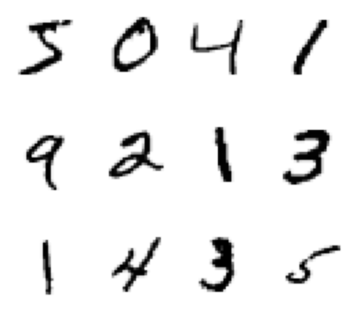

In [8]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

first element is  7


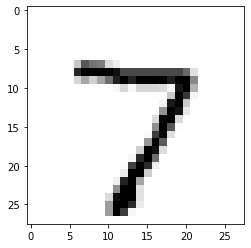

In [17]:
#imshow is a method that displays data as an image
plt.imshow(X_valid[0], cmap='Greys')
print("first element is ", y_valid[0])

Data Preprocessing

In [ ]:
"""
Mnist dataset is 28*28 images. This images should be flatten into size of 784
in order to be entered in input nerouns, since input layer is not 2d as it is for 28*28 images dataset.
X_train is consists of 60000 hand-written digit images. And each image has shape of 28*28. This shape, 28*28,  needs to  flatten into single line neurons, 784.
"""

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
"""
1. Why don't we reshape y_train and y_valid?
>>Since they are just container of labels(answers), and its dimension is 1, unlike images.
2. Why we converted our X_train and X_valid variables into type of float?
>>Since we are going to divide each values with 255, we need to convert integer values into float before we divide them. 
We intend not to make remainder after division, and we want to display floating points.
3. Okay then, why do we divide each pixel value of images with 255?
>>Because we want to make from pixels ranges(0~255) into pixels ranges(0~1). Numbers between 0~1 is much smaller, so it is much efficient.
It is a common practice to make value of data into range between 0~1. For example in the case of binary classification 0-false-1 true OR in the case of continous 
values we make our value of data fall between 0~1(Think about normal distribution where mean is 0, standard deviation is 1).  
"""

In [34]:
X_train /= 255
X_valid /= 255

In [36]:
n_classes = 10 #We have 10 classes(0~9 digits.)
#We are going to convert our labels into a value that is consists of 0 and 1 by using one-hot-encoding. That's why we imported to_categorical from keras
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [37]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
"""
1.Why do we converted our labels by one-hot-encoding?
>>The kind of shape after apply of one-hot-encoding is ideal output for neural network. So in this case, 
the shape "array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]" means, we are 100% sure that the value of y_valid[0] is 7, and there are no possibility 
that value of y_valid[0] would be 7.
So in the case of classification, especially when there is categorical output as this example, convert output values using one-hot-encoding can represent 
the percentage(probability) of the prediction when the data is fed to input. 
"""

Design Neural Network architecture

In [58]:
# Sequncial object ensure that the flow of our model would be sequential, from input layer to output layer.
model = Sequential()

# We can easily add layers by using add function from keras api.

# hidden layer : 
# We created our model right above, and then added hidden layer which is consists of 64 sigmoid neurons.
#model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # for the first hidden layer, we need to specify the shape of input layer

#I just want to change hidden layer's activation function since with the sigmoid, the model's accuracy is less than 20%.
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))

# output layer : 
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Compile model

In [64]:
#model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
"""
1. What we did from right above code?
>> We have just compile our model that we made. 
2. Okay... what is compile?
>> Compile model means we set our model. So, at first, we configure our model by constructing layers. We had made our model object, we had made hidden layer and set
its function(activation function), and finally we had made output layer and set its function(activation function).
After that we compile our model, so we can set our model's loss function, which is used to fix our prediction, and then we set loss function's optimize, which is
a way to handle our loss function, and set the performance metrics to accuracy. More detail will be dealt later.
"""

Train

In [ ]:
model.fit(X_train, y_train, batch_size=129, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Evaluating model performance

In [67]:
# To get more high accuracy score, I first changed activation functino of hidden layer from sigmoid to relu but it did not worked well.
# So I added one more hidden layer and it slightly worked well, but not that significant. But it still shows me improvement.
# I also changed optimizer from sgd to adam, and loss function from sqe to categorical_crossentropy, and also reduced epochs from 200 to 50.
# And it results into dramtic imrovement on accuracy.
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 186.4447 - accuracy: 0.7633


[186.44473266601562, 0.7633000016212463]

Performe inference

In [68]:
valid_0 = X_valid[0].reshape(1,784)
model.predict(valid_0)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)